In [1]:
import sys
import os
import rootpath
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import wfg
from testsuite.utilities import Pareto_split
from experiments.igd_refpoints.igd_utilities import *
from scipy.spatial import distance_matrix

In [2]:
# establish up data paths
try: 
    get_ipython().__class__.__name__
    script_dir = os.path.dirname(os.path.realpath(__file__))
except:
     script_dir = './'
if not os.path.isdir('./figures'):
    os.makedirs("./figures")

In [3]:
def save_fig(fig, name=None):
    figname_stub = script_dir.split('/')[-1]
    if name is None:
        filename = figname_stub+"_"+fig.get_title()
    else:
        filename = figname_stub+"_"+name
    
    savedirs = [os.path.join(script_dir, "figures/"),
                "/home/finley/phd/papers/SAF-driven-EMO/figures/"]
    for d in savedirs:
        fig.savefig(os.path.join(d, filename+".png"), dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait', pad_inches=0.12)
        fig.savefig(os.path.join(d, filename+".pdf"), bbox_inches = 'tight', pad_inches = 0, dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait')
    

In [4]:
a, b, c, d = 2, 4, 6, 8

In [5]:
try:
    with open('data/wfg_elipse_2d_refpoints', 'rb') as infile:
        yf_2 = np.load(infile)
    yf_2_loaded = True
    print("2D data: loaded")
except:
    yf_2_loaded = False
    print("2D data: not found")

2D data: loaded


In [6]:
y = abs(np.random.multivariate_normal([0., 0.], np.diag([a**2, b**2]), size=100000))
y = normalise_to_axes(y, [a, b])

if not yf_2_loaded:
    yf_2 = attainment_sample(y, 5000)

In [7]:
yf_2.shape

(5000, 2)

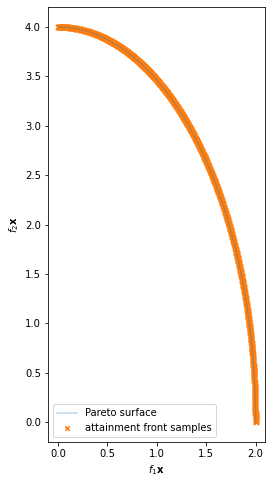

In [8]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca()
ax.plot(*y[np.argsort(y[:,0])].T, c="C0", alpha=0.3, label="Pareto surface")
ax.scatter(*yf_2.T, s=20, c="C1", marker="x", label="attainment front samples")
ax.set_xlabel(r"$f_1\mathbf{x}$")
ax.set_ylabel(r"$f_2\mathbf{x}$")
ax.set_aspect('equal')
ax.legend()

In [9]:
if not yf_2_loaded:
    with open('data/wfg_elipse_2d_refpoints', 'wb') as outfile:
        np.save(outfile, yf_2)
        print("new datapoints saved to {}".format(outfile.name))

In [10]:
try:
    with open('data/wfg_elipse_3d_refpoints', 'rb') as infile:
        yf_3 = np.load(infile)
    yf_3_loaded = True
    print("3D data: loaded")
except FileNotFoundError:
    yf_3_loaded = False
    print("3D data: not found")

3D data: loaded


In [11]:
y = abs(np.random.multivariate_normal([0., 0., 0.], np.diag([a**2, b**2, c**2]), size=100000))
y = normalise_to_axes(y, [a, b, c])

if not yf_3_loaded:
    ya = attainment_sample(y, 15000)
    D = distance_matrix(y, ya)
    min_D0 = D.min(axis=0)
    min_D1 = D.min(axis=1)
        
    # plot threshold effects
    thresh_plot_0 = [sum(min_D0<i) for i in np.linspace(0.01, 0.5, 200)]
    thresh_plot_1 = [sum(min_D1<i) for i in np.linspace(0.01, 0.5, 200)]
        
    thresh = 0.05
          
    fig = plt.figure(figsize=[17, 8])
    ax0 = fig.add_subplot(121)
    ax1 = fig.add_subplot(122, projection='3d')
    
    yf_3 = ya[min_D0<thresh]
    yf_3 = normalise_to_axes(yf_3, [a, b, c])
    
    ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(min_D0), label="Pareto surface points")
    ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(min_D1), label="Attainment surface points")
    ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
    ax0.set_xlabel("Threshhold distance")
    ax0.set_ylabel("n below threshold/n totaal")
    ax0.set_xlim([0, 0.5])
    ax0.set_ylim([0, 1.1])
    ax0.legend()
    
    ax_format(ax1, axes=[2., 4., 6.], vp=[35, 15])
    ax1.scatter(*ya[min_D0<thresh].T, s=2, c="C0", label="nn distance<threshold")
    ax1.scatter(*ya[min_D0>thresh].T, s=2, c="C1", label="nn distance>threshold")
    ax1.legend()

In [12]:
import matplotlib
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import MaxNLocator


matplotlib.rcParams['mathtext.fontset'] = 'stix';
matplotlib.rcParams['font.family'] = 'STIXGeneral';
matplotlib.rcParams['font.size'] = 15 ;
matplotlib.rcParams['legend.fontsize'] = 11
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

No handles with labels found to put in legend.


[2, 4, 6]
3d


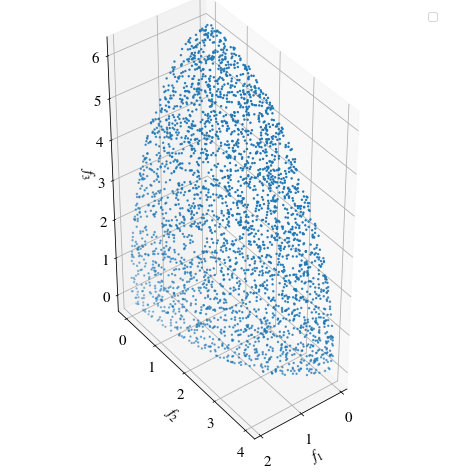

In [14]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection="3d")
ax_format(ax, axes=[2, 4, 6], vp=[40, 53])
ax.scatter(*yf_3[:3000].T, s=2, c="C0", label="$IGD^{+}$ reference points")
ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$", labelpad=10)
ax.set_zlabel("$f_3$")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))
# plt.tight_layout()
# ax.legend()

In [15]:
save_fig(fig, name="IGD_refpoint_example_WFG4")

In [13]:
if not yf_3_loaded: 
    with open('data/wfg_elipse_3d_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("Data saved")

In [15]:
del(y)
import gc
gc.collect()

614

In [16]:
try:
    with open('data/wfg_elipse_4d_refpoints', 'rb') as infile:
        yf_4 = np.load(infile)
    yf_4_loaded = True
    print("4D data: loaded")
except FileNotFoundError:
    yf_4_loaded = False
    print("4D data: not found")

4D data: loaded


In [17]:
from scipy.spatial import KDTree

In [18]:
y = abs(np.random.multivariate_normal([0., 0., 0., 0.], np.diag([a**2, b**2, c**2, d**2]), 100000))
y = normalise_to_axes(y, [a, b, c, d])
a, b, c, d = np.round(y.max(axis=0), 1)

In [19]:
ya = attainment_sample(y, 50000)

100%|██████████| 50000/50000 [1:46:19<00:00,  7.84it/s]  


In [29]:
from tqdm import tqdm

In [12]:
from scipy.spatial import KDTree
import time

In [41]:
tic = time.time()
tree0 = KDTree(y)
aa0 = tree0.query(ya)[0] 
# aa0 = [tree0.query(i)[0] for i in y] 
print(time.time()-tic)

76.49438405036926


In [42]:
tic = time.time()
tree1 = KDTree(ya)
aa1 = tree1.query(y)[0] 
# aa0 = [tree0.query(i)[0] for i in y] 
print(time.time()-tic)

42.21662735939026


In [44]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(aa0<j)
    thresh_plot_1[i] = sum(aa1<j)

200it [01:47,  1.86it/s]


No handles with labels found to put in legend.


[2.0, 4.0, 6.0]
3d


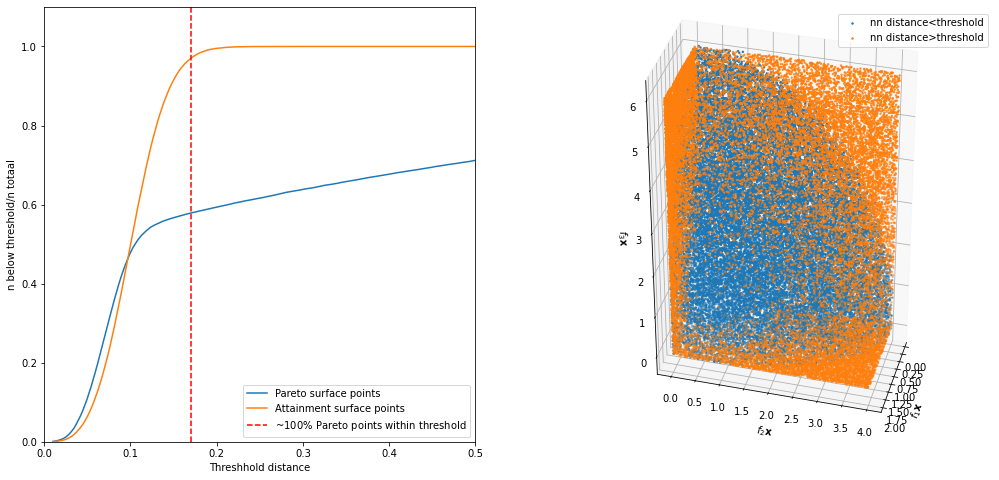

In [56]:
thresh = 0.17
      
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

yf_4 = ya[aa0<thresh]
yf_4 = normalise_to_axes(yf_4, [a, b, c, d])

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(aa0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(aa1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax_format(ax1, axes=[2., 4., 6.], vp=[35, 15])
ax1.scatter(*ya[aa0<thresh, :3].T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[aa0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")
ax1.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[2.0, 4.0, 6.0]
3d
[4.0, 6.0, 8.0]
3d
[2.0, 6.0, 8.0]
3d
[2.0, 4.0, 6.0]
3d
[4.0, 6.0, 8.0]
3d
[2.0, 6.0, 8.0]
3d


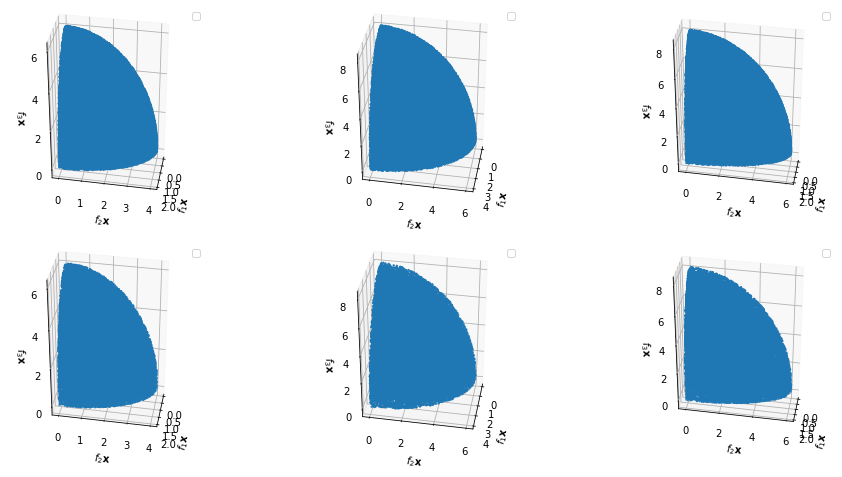

In [57]:
fig = plt.figure(figsize=[16, 8])
ax0 = fig.add_subplot(2,3,1, projection="3d")
ax1 = fig.add_subplot(2,3,2, projection="3d")
ax2 = fig.add_subplot(2,3,3, projection="3d")
ax3 = fig.add_subplot(2,3,4, projection="3d")
ax4 = fig.add_subplot(2,3,5, projection="3d")
ax5 = fig.add_subplot(2,3,6, projection="3d")

ax_format(ax0, axes=[a, b, c], vp=[35, 10]);
ax_format(ax1, axes=[b, c, d], vp=[35, 10]);
ax_format(ax2, axes=[a, c, d], vp=[35, 10]);
ax_format(ax3, axes=[a, b, c], vp=[35, 10]);
ax_format(ax4, axes=[b, c, d], vp=[35, 10]);
ax_format(ax5, axes=[a, c, d], vp=[35, 10]);

ax0.scatter(*y[:, :3].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax1.scatter(*y[:,1:4].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax2.scatter(*y[:,[0,2,3]].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")

ax3.scatter(*yf_4[:, :3].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax4.scatter(*yf_4[:,1:4].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax5.scatter(*yf_4[:,[0,2,3]].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")

In [61]:
y.shape

(100000, 4)

In [65]:
yf_4 = ya[aa0<thresh]
yf_f = normalise_to_axes(yf_4, axes=[a, b, c, d])
yf_4.shape

(28935, 4)

In [66]:
if not yf_4_loaded:
    with open('data/wfg_elipse_4d_refpoints', 'wb') as outfile:
        np.save(outfile, yf_4)

In [68]:
print(yf_4.max(axis=0))
print(a, b, c, d)

[1.99986104 3.9969399  5.9970207  7.99731508]
2.0 4.0 6.0 8.0


In [69]:
print(yf_2_loaded)
print(yf_3_loaded)
print(yf_4_loaded)

NameError: name 'yf_2_loaded' is not defined